# Concentrations moyennes annuelles de polluants en Centre-Val-de-Loire

## Source des informations

In [5]:
import pandas as pd

url = "https://opendata.arcgis.com/datasets/6f64bbd4f94c425791c2ec7eee33bb71_0.csv"
df = pd.read_csv(url)

df.head(5)

,X,Y,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,couleur,x_wgs84,y_wgs84,ObjectId
0,1.903984,47.903174,2019/01/02 00:00:00+00,3,Bon,Lig'Air,EPCI,244500468,ORLEANS,1,1,3,3,0,#0AD857,1.903984,47.903174,1
1,0.682860,47.394438,2018/10/14 00:00:00+00,4,Bon,Lig'Air,EPCI,243700754,TOURS,2,1,4,2,0,#A2F743,0.682860,47.394438,2
2,2.396232,47.079706,2019/01/02 00:00:00+00,3,Bon,Lig'Air,EPCI,241800507,BOURGES,2,1,3,3,0,#0AD857,2.396232,47.079706,3
3,1.490599,48.445544,2018/10/20 00:00:00+00,5,Moyen,Lig'Air,EPCI,200033181,CHARTRES,2,1,3,5,0,#FFFF00,1.490599,48.445544,4
4,1.696049,46.810434,2018/10/20 00:00:00+00,5,Moyen,Lig'Air,EPCI,243600327,CHATEAUROUX,1,1,4,5,0,#FFFF00,1.696049,46.810434,5


## Composition du dataframe

In [10]:
df.shape

(8096, 18)

In [8]:
df.size

145728

In [16]:
df.describe()

,X,Y,valeur,code_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,x_wgs84,y_wgs84,ObjectId
count,8096.000000,8096.000000,8096.000000,8.096000e+03,8096.000000,8096.0,8096.000000,8096.000000,8096.0,8096.000000,8096.000000,8096.000000
mean,1.698629,47.746293,3.906497,2.272758e+08,1.191082,1.0,3.695652,2.516304,0.0,1.698629,47.746293,4048.500000
std,0.605998,0.617504,1.027372,2.111662e+07,0.645352,0.0,1.071622,1.161236,0.0,0.605998,0.617504,2337.258223
min,0.682860,46.810434,1.000000,2.000304e+08,0.000000,1.0,0.000000,0.000000,0.0,0.682860,46.810434,1.000000
25%,1.350632,47.315755,3.000000,2.000385e+08,1.000000,1.0,3.000000,2.000000,0.0,1.350632,47.315755,2024.750000
50%,1.593324,47.746758,4.000000,2.427004e+08,1.000000,1.0,4.000000,2.000000,0.0,1.593324,47.746758,4048.500000
75%,2.027046,48.109851,4.000000,2.439006e+08,1.000000,1.0,4.000000,3.000000,0.0,2.027046,48.109851,6072.250000
max,2.736690,48.748753,9.000000,2.445005e+08,5.000000,1.0,9.000000,8.000000,0.0,2.736690,48.748753,8096.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8096 entries, 0 to 8095
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          8096 non-null   float64
 1   Y          8096 non-null   float64
 2   date_ech   8096 non-null   object 
 3   valeur     8096 non-null   int64  
 4   qualif     8096 non-null   object 
 5   source     8096 non-null   object 
 6   type_zone  8096 non-null   object 
 7   code_zone  8096 non-null   int64  
 8   lib_zone   8096 non-null   object 
 9   val_no2    8096 non-null   int64  
 10  val_so2    8096 non-null   int64  
 11  val_o3     8096 non-null   int64  
 12  val_pm10   8096 non-null   int64  
 13  val_pm25   8096 non-null   int64  
 14  couleur    8096 non-null   object 
 15  x_wgs84    8096 non-null   float64
 16  y_wgs84    8096 non-null   float64
 17  ObjectId   8096 non-null   int64  
dtypes: float64(4), int64(8), object(6)
memory usage: 1.1+ MB


In [9]:
df.isna().sum()

X            0
Y            0
date_ech     0
valeur       0
qualif       0
source       0
type_zone    0
code_zone    0
lib_zone     0
val_no2      0
val_so2      0
val_o3       0
val_pm10     0
val_pm25     0
couleur      0
x_wgs84      0
y_wgs84      0
ObjectId     0
dtype: int64

## Quelques définitions

Qu'est-ce que la pollution de l'air ?

# Nettoyage des données

Après analyse du contenu des colonnes, nous avons décidé de supprimer trois colonnes qui selon nous nous semblaient redondantes ou inutiles.
- La colonne d'index 5 --> Elle notait la source des informations de la ligne. Hors, toutes les informations viennent de Lig'Air
- La colonne d'index 6 --> Type de structure administrative, toutes les données similaires
- La colonne d'index 17 --> Elle sert à donner un identifiant à chaque ligne. Nous ne nous en servirons pas ici

In [15]:
df.drop(df.columns[[5, 6, 17]], axis='columns')

"""
Supprimer les colonnes lat/long en trop (les comparer d'abord) + virer les couleurs
"""

,X,Y,date_ech,valeur,qualif,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,couleur,x_wgs84,y_wgs84
0,1.903984,47.903174,2019/01/02 00:00:00+00,3,Bon,244500468,ORLEANS,1,1,3,3,0,#0AD857,1.903984,47.903174
1,0.682860,47.394438,2018/10/14 00:00:00+00,4,Bon,243700754,TOURS,2,1,4,2,0,#A2F743,0.682860,47.394438
2,2.396232,47.079706,2019/01/02 00:00:00+00,3,Bon,241800507,BOURGES,2,1,3,3,0,#0AD857,2.396232,47.079706
3,1.490599,48.445544,2018/10/20 00:00:00+00,5,Moyen,200033181,CHARTRES,2,1,3,5,0,#FFFF00,1.490599,48.445544
4,1.696049,46.810434,2018/10/20 00:00:00+00,5,Moyen,243600327,CHATEAUROUX,1,1,4,5,0,#FFFF00,1.696049,46.810434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8091,1.490599,48.445544,2018/09/04 00:00:00+00,3,Bon,200033181,CHARTRES,1,1,3,3,0,#0AD857,1.490599,48.445544
8092,1.696049,46.810434,2018/09/04 00:00:00+00,5,Moyen,243600327,CHATEAUROUX,1,1,5,3,0,#FFFF00,1.696049,46.810434
8093,1.322670,47.590341,2018/09/04 00:00:00+00,5,Moyen,200030385,BLOIS,1,1,5,3,0,#FFFF00,1.322670,47.590341
8094,1.359952,48.748753,2018/09/04 00:00:00+00,3,Bon,200040277,DREUX,1,1,3,3,0,#0AD857,1.359952,48.748753


## Quelques graphiques

In [7]:
import pandas as pd
url = "https://opendata.arcgis.com/datasets/6f64bbd4f94c425791c2ec7eee33bb71_0.csv"
df = pd.read_csv(url)

Analyse des valeurs des cinq types de polluants du dataframe sous forme de minimum/maximum/moyenne

In [14]:
data=df.groupby('lib_zone')['val_pm10'].agg(['min', 'max', 'mean'])

data = data.reset_index()

data

,lib_zone,min,max,mean
0,BLOIS,1,8,2.540514
1,BOURGES,1,7,2.513834
2,CHARTRES,1,8,2.671937
3,CHATEAUROUX,1,7,2.587945
4,DREUX,0,8,2.547431
5,MONTARGIS,0,8,2.199605
6,ORLEANS,0,8,2.271739
7,TOURS,1,8,2.797431


In [15]:
newDfMean = pd.DataFrame(data,columns=['lib_zone','mean'])
newDfMean

,lib_zone,mean
0,BLOIS,2.540514
1,BOURGES,2.513834
2,CHARTRES,2.671937
3,CHATEAUROUX,2.587945
4,DREUX,2.547431
5,MONTARGIS,2.199605
6,ORLEANS,2.271739
7,TOURS,2.797431


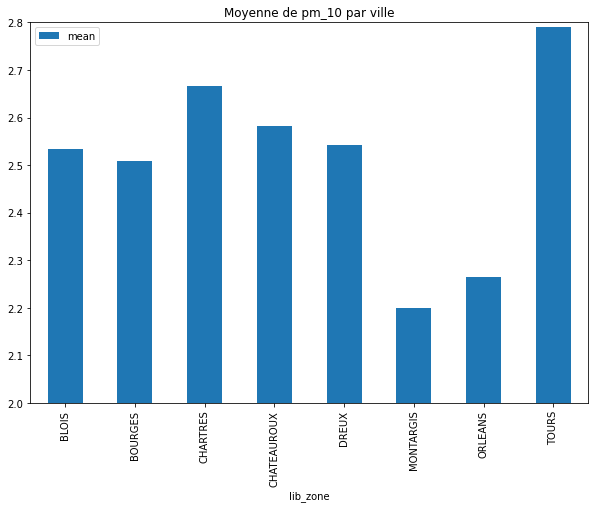

In [66]:
newDfMean.plot(kind = 'bar', x="lib_zone", figsize=(10,7), title = 'Moyenne de pm_10 par ville', ylim=(2,2.8));

## Quelle période ?

In [25]:
import numpy as np
#pd.to_datetime(df.date_ech)
df['date_ech'] = pd.to_datetime(df['date_ech'])

df['Day'] = df['date_ech'].dt.day
df['Month'] = df['date_ech'].dt.month
df['Year'] = df['date_ech'].dt.year 

dateColumns = ['lib_zone','Day','Month',"Year","val_no2", "val_so2","val_o3","val_pm10","val_pm25","date_ech"]

df[dateColumns]

,lib_zone,Day,Month,Year,val_no2,val_so2,val_o3,val_pm10,val_pm25,date_ech
0,ORLEANS,2,1,2019,1,1,3,3,0,2019-01-02 00:00:00+00:00
1,TOURS,14,10,2018,2,1,4,2,0,2018-10-14 00:00:00+00:00
2,BOURGES,2,1,2019,2,1,3,3,0,2019-01-02 00:00:00+00:00
3,CHARTRES,20,10,2018,2,1,3,5,0,2018-10-20 00:00:00+00:00
4,CHATEAUROUX,20,10,2018,1,1,4,5,0,2018-10-20 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
8091,CHARTRES,4,9,2018,1,1,3,3,0,2018-09-04 00:00:00+00:00
8092,CHATEAUROUX,4,9,2018,1,1,5,3,0,2018-09-04 00:00:00+00:00
8093,BLOIS,4,9,2018,1,1,5,3,0,2018-09-04 00:00:00+00:00
8094,DREUX,4,9,2018,1,1,3,3,0,2018-09-04 00:00:00+00:00


In [27]:
dataSet = ['val_pm10','val_no2',"val_o3","val_pm25","val_so2"]
data=df.groupby(['lib_zone',"Year","Month"])[dataSet].agg(['min', 'max', 'mean'])
data.head(40)

val_pm10               val_no2               val_o3      \
                         min max      mean     min max      mean    min max   
lib_zone Year Month                                                           
BLOIS    2018 1            1   4  2.064516       1   3  1.290323      2   4   
              2            1   7  3.357143       1   4  1.607143      2   4   
              3            1   5  2.419355       1   2  1.225806      3   4   
              4            1   4  2.333333       1   3  1.466667      3   5   
              5            1   5  2.741935       1   1  1.000000      4   6   
              6            1   4  2.500000       1   1  1.000000      3   6   
              7            2   5  2.935484       1   2  1.032258      3   6   
              8            1   4  2.354839       1   2  1.225806      3   7   
              9            1   4  2.466667       1   3  1.466667      3   6   
              10           2   5  3.000000       1   4  1.580645      2   5   
              11           2   5  2.633333       1   3  1.466667      1   3   
              12           1   5  2.645161       1   2  1.225806      1   4   
         2019 1            1   6  2.903226       1   3  1.419355      2   4   
              2            1   6  3.535714       1   4  1.964286      3   4   
              3            1   6  2.967742       1   3  1.387097      3   6   
              4            1   6  2.800000       1   2  1.133333      3   6   
              5            1   5  2.133333       1   2  1.100000      3   6   
              6            1   6  2.366667       1   2  1.066667      3   7   
              7            2   5  3.096774       1   2  1.161290      3   7   
              8            1   3  2.225806       1   2  1.193548      2   6   
              9            1   4  2.266667       1   2  1.166667      3   5   
              10           1   3  2.032258       1   2  1.161290      1   4   
              11           1   3  1.966667       1   3  1.266667      2   4   
              12           2   7  2.774194       1   2  1.290323      1   4   
         2020 1            1   8  2.774194       1   2  1.290323      1   3   
              2            1   4  2.310345       1   3  1.172414      3   4   
              3            1   8  2.838710       1   2  1.064516      2   4   
              4            2   4  3.033333       1   2  1.100000      4   6   
              5            1   3  2.225806       1   1  1.000000      3   5   
              6            1   3  1.833333       1   2  1.033333      3   6   
              7            1   4  2.290323       1   2  1.032258      2   6   
              8            1   4  2.032258       1   2  1.129032      3   7   
              9            1   5  2.366667       1   3  1.366667      3   6   
              10           1   2  1.555556       1   1  1.000000      2   3   
BOURGES  2018 1            1   4  2.064516       1   2  1.419355      2   4   
              2            1   6  3.285714       1   3  1.500000      1   4   
              3            1   5  2.483871       1   3  1.483871      3   5   
              4            1   5  2.333333       1   3  1.233333      3   6   
              5            1   5  2.709677       1   1  1.000000      3   6   
              6            1   3  2.266667       1   1  1.000000      3   5   

                              val_pm25          val_so2           
                         mean      min max mean     min max mean  
lib_zone Year Month                                               
BLOIS    2018 1      3.096774        0   0    0       1   1    1  
              2      2.928571        0   0    0       1   1    1  
              3      3.774194        0   0    0       1   1    1  
              4      4.133333        0   0    0       1   1    1  
              5      4.612903        0   0    0       1   1    1  
              6      4.066667        0   0    0       1   1    1  
              7    

Quel range de dates ?

In [44]:
df["date_ech"].min()

Timestamp('2018-01-01 00:00:00+0000', tz='UTC')

In [43]:
df["date_ech"].max()

Timestamp('2020-10-09 00:00:00+0000', tz='UTC')

In [47]:
dataParVille=df.groupby(['lib_zone',"Year","Month"])[dataSet].mean()
dataParVille

val_pm10   val_no2    val_o3  val_pm25  val_so2
lib_zone Year Month                                                 
BLOIS    2018 1      2.064516  1.290323  3.096774       0.0      1.0
              2      3.357143  1.607143  2.928571       0.0      1.0
              3      2.419355  1.225806  3.774194       0.0      1.0
              4      2.333333  1.466667  4.133333       0.0      1.0
              5      2.741935  1.000000  4.612903       0.0      1.0
...                       ...       ...       ...       ...      ...
TOURS    2020 6      2.200000  1.033333  3.700000       0.0      1.0
              7      2.451613  1.096774  3.741935       0.0      1.0
              8      2.419355  1.322581  3.838710       0.0      1.0
              9      2.733333  1.633333  3.800000       0.0      1.0
              10     2.000000  1.111111  2.888889       0.0      1.0

[272 rows x 5 columns]

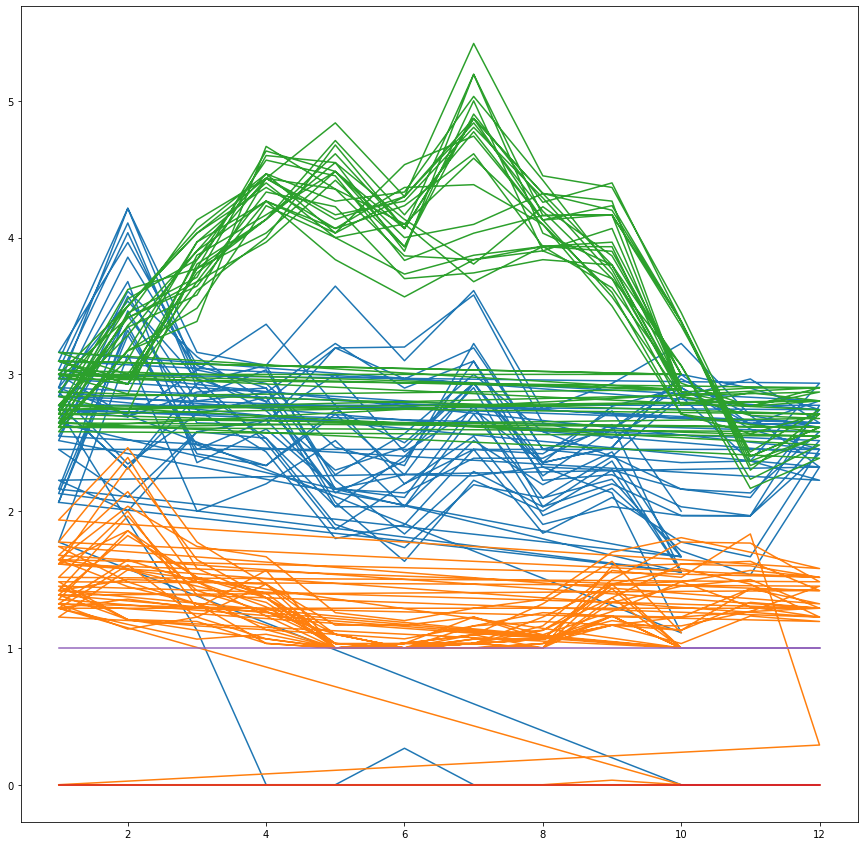

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize =(15,15))
plt.plot(dataParVille["Month"],dataParVille[dataSet])

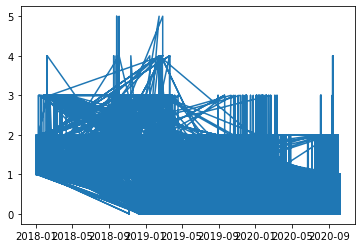

In [64]:
plt.plot('date_ech','val_no2', data =df )

In [62]:
df.date_ech

0      2019-01-02 00:00:00+00:00
1      2018-10-14 00:00:00+00:00
2      2019-01-02 00:00:00+00:00
3      2018-10-20 00:00:00+00:00
4      2018-10-20 00:00:00+00:00
                  ...           
8091   2018-09-04 00:00:00+00:00
8092   2018-09-04 00:00:00+00:00
8093   2018-09-04 00:00:00+00:00
8094   2018-09-04 00:00:00+00:00
8095   2018-09-04 00:00:00+00:00
Name: date_ech, Length: 8096, dtype: datetime64[ns, UTC]